In [1]:
# https://towardsdatascience.com/using-lstms-to-predict-stock-prices-a9965dfec2c9

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import *
from keras.callbacks import *
import os
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [ ]:
# Data

In [2]:
'''The data that was used for this project was Apple’s stock price over the last 5 years. It was broken down into time steps of 10 minutes each. A neural network needs examples to train and needs labelled data, so the data was inputted in a specific way. The input was 50 timesteps and the label (which is what the neural network is trying to predict) is the 51st timestep. The neural network tries to predict the price at the next time step, and the data was created accordingly to train the neural network.'''

'The data that was used for this project was Apple’s stock price over the last 5 years. It was broken down into time steps of 10 minutes each. A neural network needs examples to train and needs labelled data, so the data was inputted in a specific way. The input was 50 timesteps and the label (which is what the neural network is trying to predict) is the 51st timestep. The neural network tries to predict the price at the next time step, and the data was created accordingly to train the neural network.'

In [8]:
data = pd.read_csv('AAPL_data.csv')

In [9]:
open_data = data["open"].values

In [10]:
open_data = open_data.reshape(-1,1)

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
open_data = scaler.fit_transform(open_data)

In [12]:
open_data.shape
data_train = open_data[:1001]
data_test = open_data[975:]

In [13]:
#Creating X_test and Y_Test tensors
x_train = []
y_train = []

for i in range(50,1001):
  x_train.append(data_train[i-50:i])
  y_train.append(data_train[i])
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [14]:
#Creating X_test and Y_Test tensors
x_test = []
y_test = []

for i in range(50,data_test.shape[0]):
  x_test.append(data_test[i-50:i])
  y_test.append(data_test[i])
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [3]:
# Architecture

In [4]:
'''I used a lot of LSTMs for this neural network. Each LSTM had 96 cells in it and returns the cell state into the next LSTM as input. In the end, it had 2 dense layers that took in the output of the LSTM layers and made sense of it. The last dense layer has one node in it, which indicates that it outputs one number, the predicted value of the next time step. It had over 1 million parameters it could optimize. The dropout layers were used to make sure that the neural network wasn’t just memorizing the data and the output. I know, all this work just to find the next value for the next timestep.'''

'I used a lot of LSTMs for this neural network. Each LSTM had 96 cells in it and returns the cell state into the next LSTM as input. In the end, it had 2 dense layers that took in the output of the LSTM layers and made sense of it. The last dense layer has one node in it, which indicates that it outputs one number, the predicted value of the next time step. It had over 1 million parameters it could optimize. The dropout layers were used to make sure that the neural network wasn’t just memorizing the data and the output. I know, all this work just to find the next value for the next timestep.'

In [ ]:
# Training

In [ ]:
'''This model was trained using the popular Adam optimizer and MSE loss function. The loss function is how bad the model performed and the optimizer finds the minimum of the function, which are the best parameters for the network. It ran over 100 epochs and reached a loss < 0.00001 (it performs pretty good).'''

In [15]:
model = Sequential([
  layers.LSTM(units=96, return_sequences=True, input_shape=(50,1)),
  layers.Dropout(0.2),
  layers.LSTM(units=96, return_sequences=True),
  layers.Dropout(0.2),
  layers.LSTM(units=96, return_sequences=True),
  layers.Dropout(0.2),
  layers.LSTM(units=96, return_sequences=True),
  layers.Dropout(0.2),
  layers.LSTM(units=96, return_sequences=True),
  layers.Dropout(0.2),
  layers.LSTM(units=96),
  layers.Dropout(0.2),
  layers.Dense(1)
])

In [16]:
model.compile(loss="mean_squared_error", optimizer="adam")

In [17]:
mcp_save = ModelCheckpoint('mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')

In [18]:
model.fit(x_train,y_train, epochs=100, batch_size=32, validation_split=0.15, callbacks=[mcp_save,earlyStopping])

Train on 808 samples, validate on 143 samples
Epoch 1/100
808/808 [==============================] - 8s 10ms/step - loss: 0.0228 - val_loss: 0.0040
Epoch 2/100
808/808 [==============================] - 5s 7ms/step - loss: 0.0045 - val_loss: 0.0016
Epoch 3/100
808/808 [==============================] - 6s 7ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 4/100
808/808 [==============================] - 5s 7ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 5/100
808/808 [==============================] - 6s 7ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 6/100
808/808 [==============================] - 6s 7ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 7/100
808/808 [==============================] - 6s 7ms/step - loss: 0.0031 - val_loss: 0.0010
Epoch 8/100
808/808 [==============================] - 6s 7ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 9/100
808/808 [==============================] - 5s 7ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 10/100
808/808 [======================

In [20]:
from tensorflow.keras.models import load_model
prediction_model = load_model('mdl_wts.hdf5')

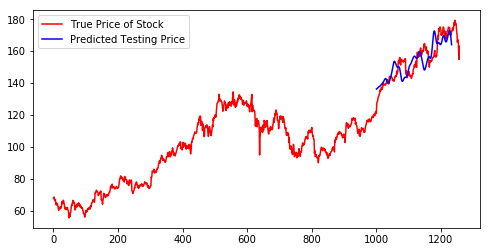

In [21]:
predictions = prediction_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
open_data = scaler.inverse_transform(open_data)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(open_data, color="red", label="True Price of Stock")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()